In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

In [3]:
filename = 'source/tr_eikon_eod_data.csv'
data = pd.read_csv(filename,index_col=0,parse_dates=True) # parse_dates tells the compiler that these are dates
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

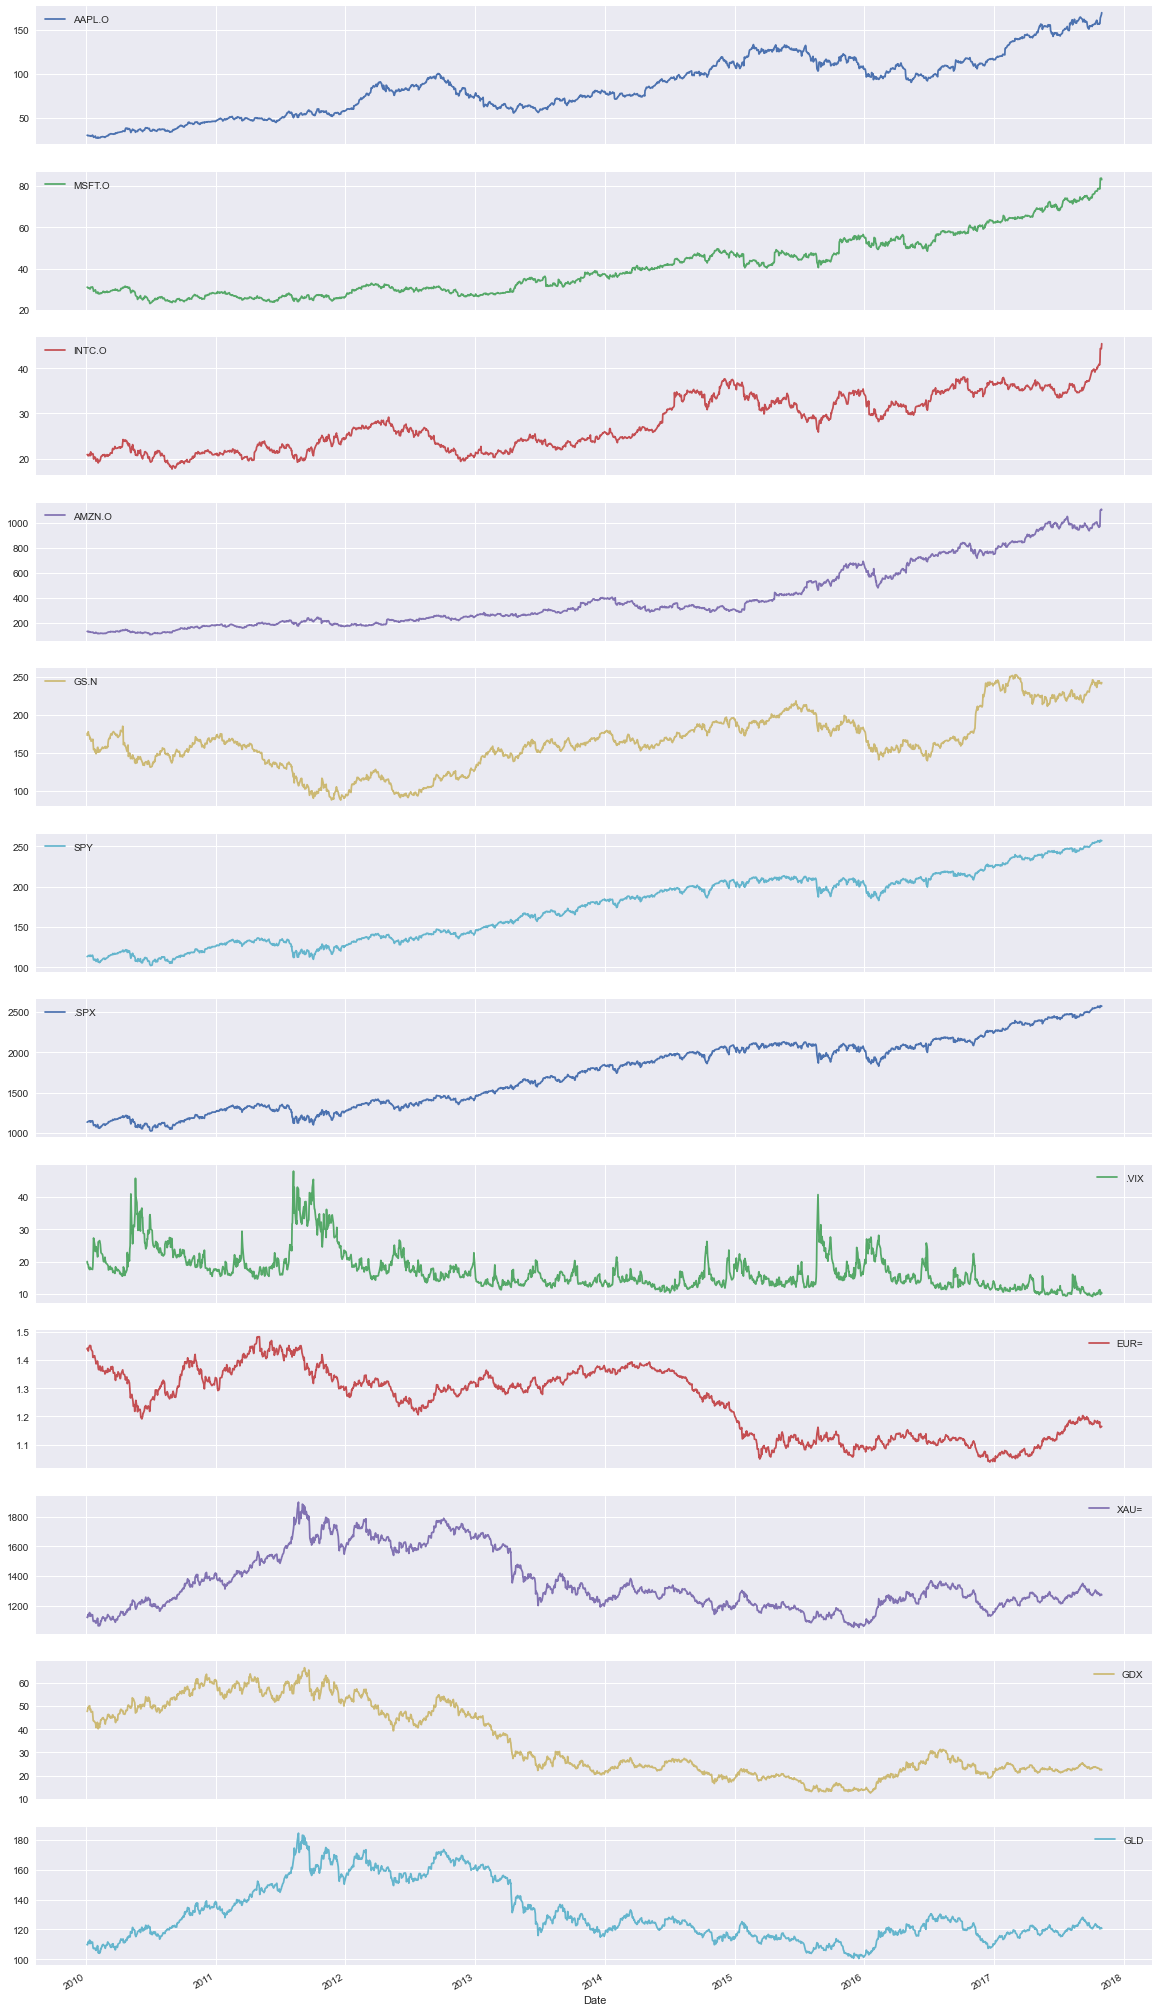

In [4]:
data.plot(figsize=(20,40),subplots=True)

In [5]:
data.describe().round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00
mean,86.53,40.59,27.70,401.15,163.61,172.84,1727.54,17.21,1.25,1352.47,34.50,130.60
std,34.04,14.39,5.95,257.12,37.17,42.33,424.35,5.92,0.12,195.38,15.44,19.46
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.19,1.04,1051.36,12.47,100.50
25%,57.57,28.12,22.23,202.66,144.23,132.64,1325.53,13.25,1.13,1214.56,22.22,116.77
50%,84.63,36.54,26.41,306.42,162.09,178.80,1783.81,15.65,1.29,1288.82,26.59,123.90
75%,111.87,50.08,33.74,559.45,184.11,208.01,2080.15,19.20,1.35,1491.98,49.77,145.43
max,169.04,83.89,45.49,1110.85,252.89,257.71,2581.07,48.00,1.48,1897.10,66.63,184.59


In [6]:
#Absolute difference mean
data.diff().mean()

AAPL.O    0.070252
MSFT.O    0.026499
INTC.O    0.012486
AMZN.O    0.492836
GS.N      0.035211
SPY       0.072968
.SPX      0.731745
.VIX     -0.005003
EUR=     -0.000140
XAU=      0.076712
GDX      -0.012801
GLD       0.005515
dtype: float64

<AxesSubplot:>

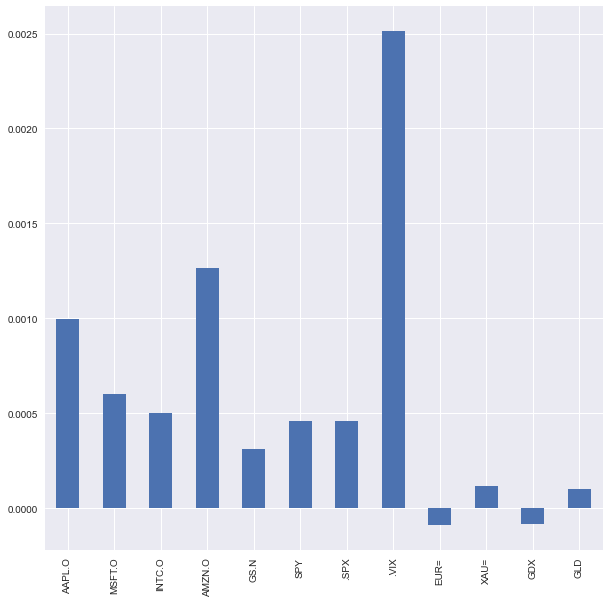

In [7]:
#Absolute difference doesnt make sense in real world finances, but %change does
data.pct_change().mean().plot(kind = 'bar',figsize=(10,10))


In [8]:
#Log returns are preferred sometimes, leading to normalisation
ldata = np.log(data/data.shift(1))
ldata.head(
)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001727,0.000323,-0.000479,0.005883,0.017525,0.002644,0.003111,-0.035038,-0.002988,-0.001206,0.009595,-0.000911
2010-01-06,-0.016034,-0.006156,-0.003360,-0.018282,-0.010731,0.000704,0.000545,-0.009868,0.003058,0.017589,0.023999,0.016365
2010-01-07,-0.001850,-0.010389,-0.009662,-0.017160,0.019379,0.004212,0.003993,-0.005233,-0.006544,-0.005814,-0.004876,-0.006207
2010-01-08,0.006626,0.006807,0.011103,0.026717,-0.019093,0.003322,0.002878,-0.050024,0.006544,0.003704,0.014959,0.004951


<AxesSubplot:xlabel='Date'>

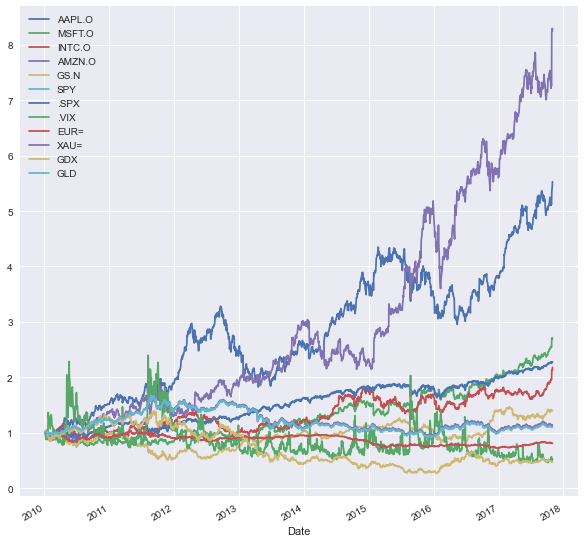

In [9]:
ldata.cumsum().apply(np.exp).plot(figsize=(10,10))

# RESAMPLING
#### Resampling can be termed as strecthing of time frames or resampling it to other observations


In [10]:
data.resample('1w', label='right').last().head() 

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-10,30.282827,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-17,29.418542,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-24,28.249972,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-31,27.437544,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96
2010-02-07,27.922829,28.02,19.47,117.39,154.16,106.66,1066.19,26.11,1.3662,1064.95,42.41,104.68


In [11]:
sym = 'AAPL.O'
data = pd.DataFrame(data[sym]).dropna()
window = 20
data['min'] = data[sym].rolling(window=window).min() 
data['std'] = data[sym].rolling(window=window).std()
data['mean'] = data[sym].rolling(window=window).mean()
data['max'] = data[sym].rolling(window=window).max()
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean() 
data

,AAPL.O,min,std,mean,max,ewma
Date,,,,,,
2010-01-04,30.572827,NaN,NaN,NaN,NaN,NaN
2010-01-05,30.625684,NaN,NaN,NaN,NaN,NaN
2010-01-06,30.138541,NaN,NaN,NaN,NaN,NaN
2010-01-07,30.082827,NaN,NaN,NaN,NaN,NaN
2010-01-08,30.282827,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2017-10-25,156.410000,153.28,2.009366,156.1580,160.47,156.528352
2017-10-26,157.410000,153.48,1.907676,156.3645,160.47,157.189588
2017-10-27,163.050000,153.48,2.348753,156.8110,163.05,161.584897


<AxesSubplot:xlabel='Date'>

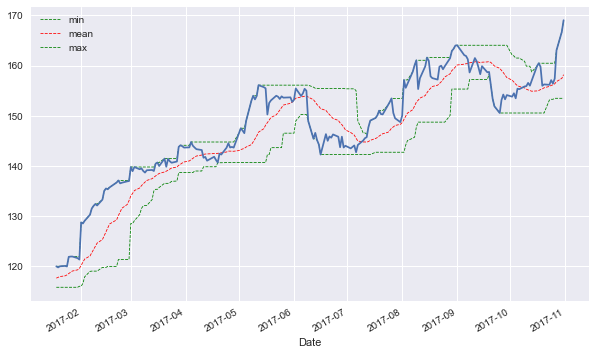

In [12]:
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax)

In [13]:
data['sma1'] = data[sym].rolling(window=37).mean()
data['sma2'] = data[sym].rolling(window=200).mean()
data.dropna(inplace=True)


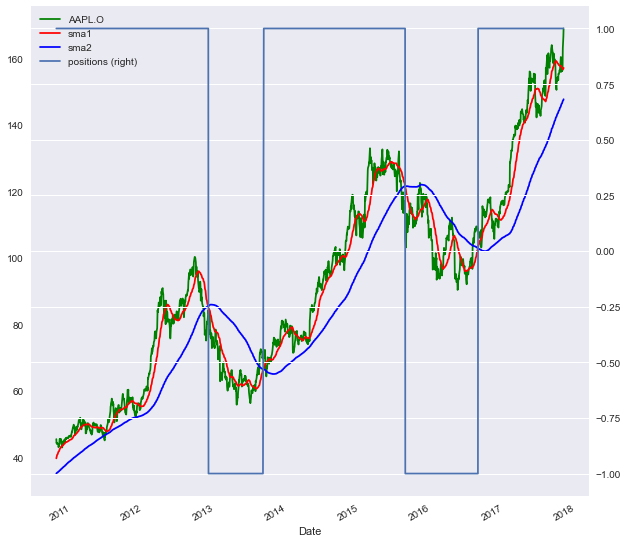

In [14]:
data['positions'] = np.where(data['sma1']>data['sma2'],1,-1)
ax = data[[sym,'sma1','sma2','positions']].plot(figsize=(10,10),style=['g', 'r', 'b'],secondary_y='positions')

# Correlation Analysis


<AxesSubplot:xlabel='Date'>

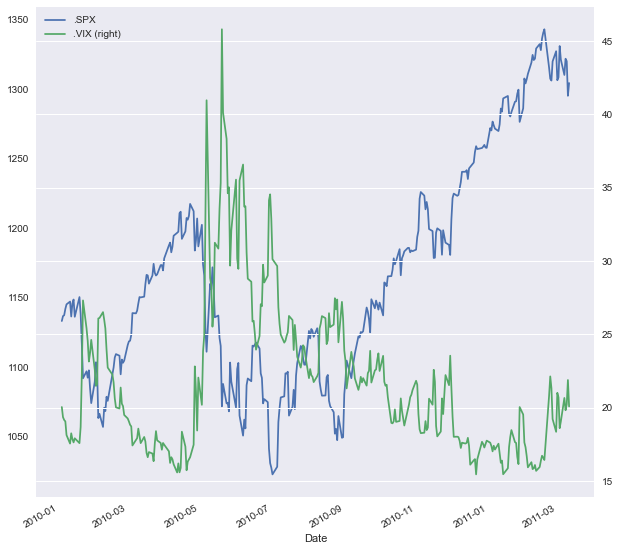

In [15]:
data= pd.read_csv('source/tr_eikon_eod_data.csv',index_col=0,parse_dates=True)
data = data[['.SPX','.VIX']].dropna()
data.iloc[:300].plot(figsize=(10,10),secondary_y='.VIX')

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

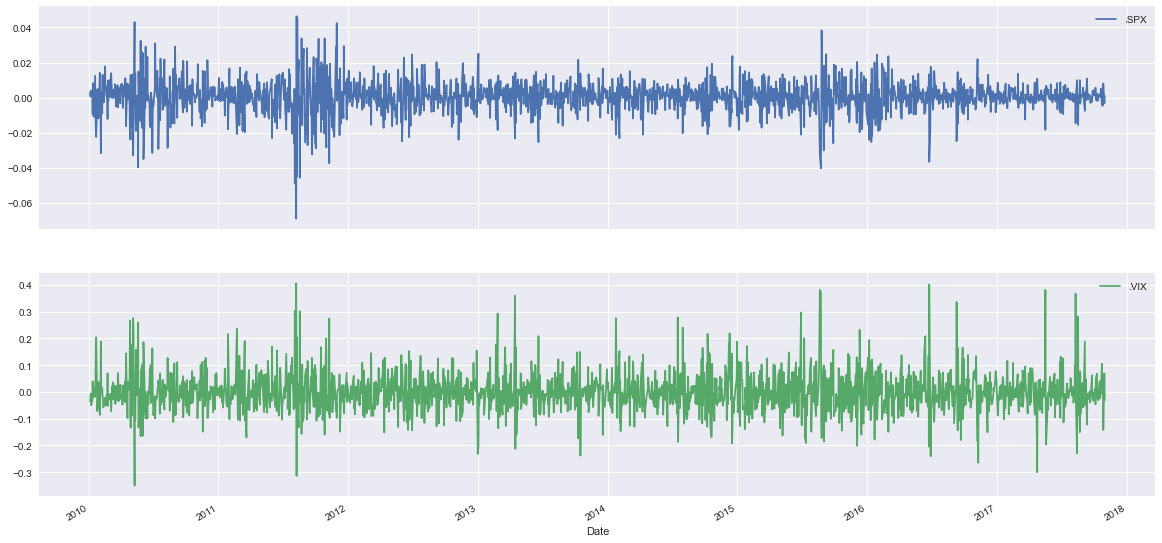

In [16]:
ldata = np.log(data/data.shift(1)).dropna()
ldata.plot(figsize=(20,10), subplots = True )

# OLS Regression

[-6.45336250e+00  2.34474296e-03]


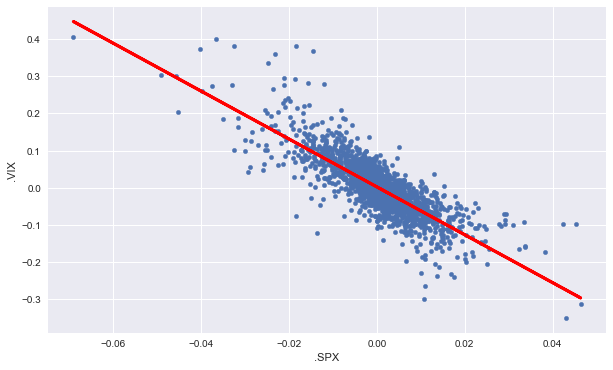

In [22]:
poly = np.polyfit(ldata['.SPX'],ldata['.VIX'],deg =1)
ax = ldata.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10, 6))
ax.plot(ldata['.SPX'],np.polyval(poly,ldata['.SPX']),'r',lw=3)


# Correlation Analysis

In [28]:
ldata.corr()

,.SPX,.VIX
.SPX,1.000000,-0.808372
.VIX,-0.808372,1.000000


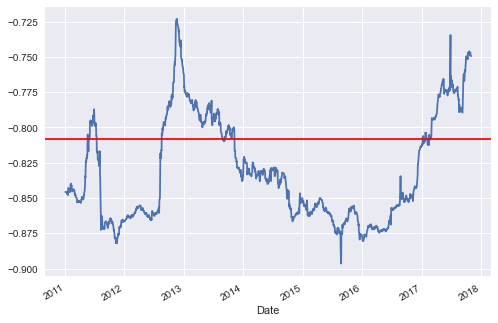

In [42]:
ax=ldata['.SPX'].rolling(window=252).corr(ldata[".VIX"]).plot()
ax.axhline(ldata[".SPX"].corr(ldata[".VIX"]),c='r')

# High Frequency Data

In [68]:
%%time
tick = pd.read_csv('source/fxcm_eur_usd_tick_data.csv', index_col=0, parse_dates=True)
tick

Wall time: 26 ms


,Bid,Ask
2017-11-10 12:00:00.007,1.16395,1.16394
2017-11-10 12:00:00.053,1.16394,1.16394
2017-11-10 12:00:00.740,1.16394,1.16393
2017-11-10 12:00:00.746,1.16394,1.16391
2017-11-10 12:00:00.756,1.16394,1.16392
...,...,...
2017-11-10 13:59:59.716,1.16481,1.16481
2017-11-10 13:59:59.757,1.16481,1.16482
2017-11-10 14:00:00.005,1.16482,1.16482
2017-11-10 14:00:00.032,1.16482,1.16483


<AxesSubplot:>

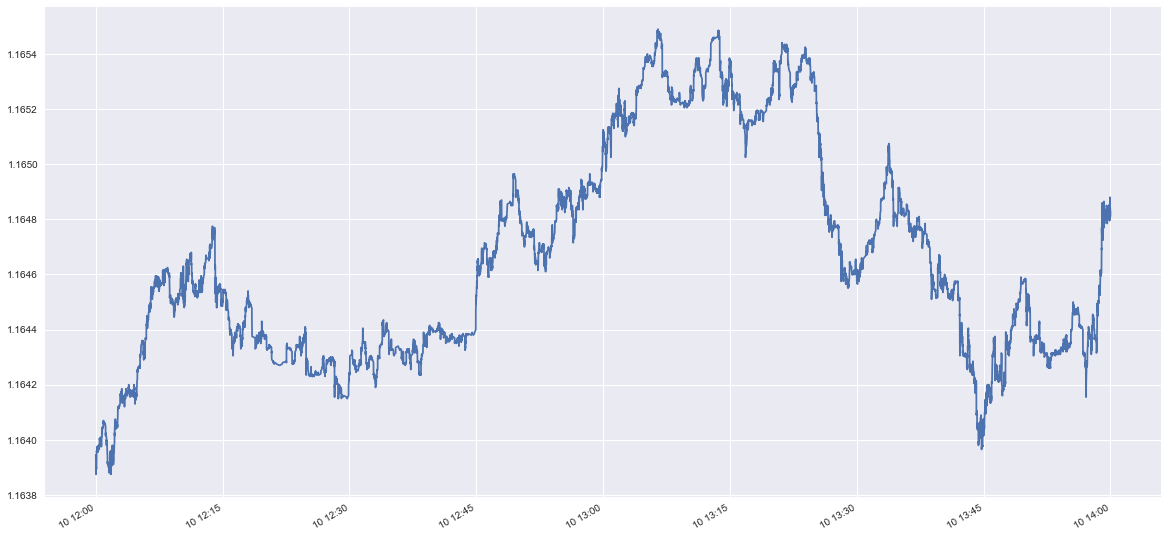

In [70]:
tick['mid']=tick.mean(axis=1)
tick['mid'].plot(figsize=(20,10))

<AxesSubplot:>

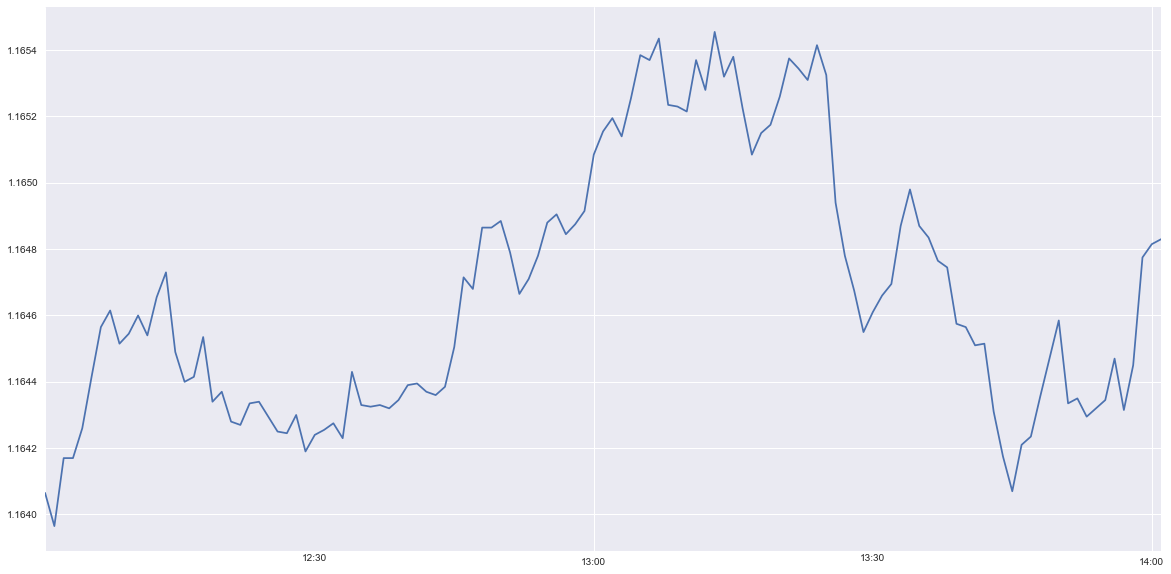

In [71]:
ticker=tick.resample(rule='1min',label='right').last()
ticker['mid'].plot(figsize=(20,10))